In [1]:
# import packages

import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
import warnings
import sys
import os

import warnings
warnings.simplefilter('ignore')

## Raw data

    days          ct       pdf       cdf
80     1  3867748181  0.718049  0.718049
66     2   575241572  0.106794  0.824843
15     3   236673362  0.043938  0.868781


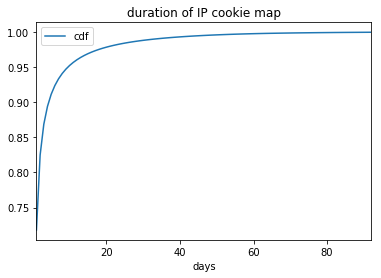

In [17]:
days_dtrn['pdf']=days_dtrn['ct']/days_dtrn['ct'].sum()
days_dtrn=days_dtrn.sort_values('days')
days_dtrn['cdf']=days_dtrn['pdf'].cumsum()
print(days_dtrn[:3])
days_dtrn.to_csv(WF+'02_IPCookieRelation_DaysDtrn.csv',index=False)

import matplotlib.pyplot as plt
days_dtrn.plot(x='days', y='cdf', kind='line',title='duration of IP cookie map')

## serious modeling
### https://github.com/ageron/handson-ml/blob/master/03_classification.ipynb

In [16]:
from sklearn.preprocessing import Imputer
imputer = Imputer()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(imputer.fit_transform(X), y, test_size=0.2, random_state=10)

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds = StratifiedKFold(n_splits=3, random_state=10)

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

model_eval=[]

/anaconda3/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [17]:
# SGD Classifier
from sklearn.linear_model import SGDClassifier
for i in [5,10]:
    print(i)
    sgd_clf = SGDClassifier(max_iter=i, tol=-np.infty, random_state=42)

    for train_index, test_index in skfolds.split(X_train, y_train):
        clone_clf = clone(sgd_clf)
        X_train_folds = X_train[train_index]
        y_train_folds = (y_train[train_index])
        X_test_fold = X_train[test_index]
        y_test_fold = (y_train[test_index])

        clone_clf.fit(X_train_folds, y_train_folds)
        y_pred = clone_clf.predict(X_test_fold)
        model_eval.append(['SGD',['max_iter'],i,accuracy_score(y_test_fold=='Static',y_pred=='Static'),
                          precision_score(y_test_fold=='Static',y_pred=='Static'),
                          recall_score(y_test_fold=='Static',y_pred=='Static'),
                          f1_score(y_test_fold=='Static',y_pred=='Static')])
    print(pd.DataFrame(model_eval))

del(sgd_clf)

5
     0           1  2         3         4         5         6
0  SGD  [max_iter]  5  0.570131  0.782277  0.480051  0.594984
1  SGD  [max_iter]  5  0.675290  0.745044  0.769724  0.757183
2  SGD  [max_iter]  5  0.717297  0.717880  0.939340  0.813813
10
     0           1   2         3         4         5         6
0  SGD  [max_iter]   5  0.570131  0.782277  0.480051  0.594984
1  SGD  [max_iter]   5  0.675290  0.745044  0.769724  0.757183
2  SGD  [max_iter]   5  0.717297  0.717880  0.939340  0.813813
3  SGD  [max_iter]  10  0.712896  0.703515  0.973956  0.816935
4  SGD  [max_iter]  10  0.604071  0.734609  0.623178  0.674321
5  SGD  [max_iter]  10  0.672186  0.758830  0.735292  0.746876


In [18]:
# decision tree Classifier (tune parameter)
from sklearn import tree

for i in [2,5,8,11,14,17]:
    print(i)
    tree_clf = tree.DecisionTreeClassifier(min_samples_split=100,max_depth=i)
    for train_index, test_index in skfolds.split(X_train, y_train):
        clone_clf = clone(tree_clf)
        X_train_folds = X_train[train_index]
        y_train_folds = (y_train[train_index])
        X_test_fold = X_train[test_index]
        y_test_fold = (y_train[test_index])

        clone_clf.fit(X_train_folds, y_train_folds)
        y_pred = clone_clf.predict(X_test_fold)
        x=['DecisionTree',['max_depth'],i,accuracy_score(y_test_fold=='Static',y_pred=='Static'),
                          precision_score(y_test_fold=='Static',y_pred=='Static'),
                          recall_score(y_test_fold=='Static',y_pred=='Static'),
                          f1_score(y_test_fold=='Static',y_pred=='Static')]
        model_eval.append(x)
        print(x)

del(tree_clf)

2
['DecisionTree', ['max_depth'], 2, 0.8660440043702029, 0.8639607198704456, 0.945163643708201, 0.9027397767152031]
['DecisionTree', ['max_depth'], 2, 0.8663829928560467, 0.8644451115940425, 0.9450478560123414, 0.9029512841190628]
['DecisionTree', ['max_depth'], 2, 0.8655605627673403, 0.8636236310477806, 0.9447979502948236, 0.902388961576471]
5
['DecisionTree', ['max_depth'], 5, 0.8918288886903821, 0.9020889839633132, 0.937270056953617, 0.9193430695891088]
['DecisionTree', ['max_depth'], 5, 0.8917172286317004, 0.9041743748378336, 0.9343997409141482, 0.9190386118800911]
['DecisionTree', ['max_depth'], 5, 0.8915876933295922, 0.9040266845237344, 0.9343683427458075, 0.9189471277791715]
8
['DecisionTree', ['max_depth'], 8, 0.9111575311560195, 0.9170053910482743, 0.9509982988785135, 0.9336925528059463]
['DecisionTree', ['max_depth'], 8, 0.9115159885751718, 0.9167077452390773, 0.9519681296543606, 0.9340052701484952]
['DecisionTree', ['max_depth'], 8, 0.9113561272811603, 0.916178677672661, 0.9

In [19]:
# random forest Classifier (tune parameter)
from sklearn.ensemble import RandomForestClassifier
for n in [20,40]:
    print(n)
    rnd_clf = RandomForestClassifier(n_estimators=n, random_state=42,max_depth=14)

    for train_index, test_index in skfolds.split(X_train, y_train):
        clone_clf = clone(rnd_clf)
        X_train_folds = X_train[train_index]
        y_train_folds = (y_train[train_index])
        X_test_fold = X_train[test_index]
        y_test_fold = (y_train[test_index])

        clone_clf.fit(X_train_folds, y_train_folds)
        y_pred = clone_clf.predict(X_test_fold)
        x=['RandomForest',['n_estimators'],n,accuracy_score(y_test_fold=='Static',y_pred=='Static'),
                          precision_score(y_test_fold=='Static',y_pred=='Static'),
                          recall_score(y_test_fold=='Static',y_pred=='Static'),
                          f1_score(y_test_fold=='Static',y_pred=='Static')]
        model_eval.append(x)
        print(x)

del(rnd_clf)

20
['RandomForest', ['n_estimators'], 20, 0.9224712718710562, 0.9247778558456737, 0.9602343264377262, 0.9421726287591592]
['RandomForest', ['n_estimators'], 20, 0.9227054716864448, 0.9245509975180367, 0.9608994527507848, 0.9423748552274163]
['RandomForest', ['n_estimators'], 20, 0.9219409403505557, 0.9246708834527642, 0.9594873299421148, 0.9417574285767998]
40
['RandomForest', ['n_estimators'], 40, 0.9228892813215054, 0.9249313984655383, 0.9607383946775966, 0.9424949269272552]
['RandomForest', ['n_estimators'], 40, 0.9230106758468414, 0.9250686931782938, 0.9607714768764136, 0.9425821219316376]
['RandomForest', ['n_estimators'], 40, 0.9224660295355509, 0.9250259650700595, 0.9599226224107715, 0.9421512672394161]


In [20]:
from sklearn.linear_model import LogisticRegression

for c in [1,3]:
    print(c)
    log_clf = LogisticRegression(solver="liblinear", random_state=42,C=c)

    for train_index, test_index in skfolds.split(X_train, y_train):
        clone_clf = clone(log_clf)
        X_train_folds = X_train[train_index]
        y_train_folds = (y_train[train_index])
        X_test_fold = X_train[test_index]
        y_test_fold = (y_train[test_index])

        clone_clf.fit(X_train_folds, y_train_folds)
        y_pred = clone_clf.predict(X_test_fold)
        x=['Logisitic',['C'],c,accuracy_score(y_test_fold=='Static',y_pred=='Static'),
                          precision_score(y_test_fold=='Static',y_pred=='Static'),
                          recall_score(y_test_fold=='Static',y_pred=='Static'),
                          f1_score(y_test_fold=='Static',y_pred=='Static')]
        model_eval.append(x)
        print(x)

del(log_clf)

1
['Logisitic', ['C'], 1, 0.45845844986062534, 0.8039896573316995, 0.2336142998674971, 0.3620330851575501]
['Logisitic', ['C'], 1, 0.47143163083237705, 0.8023099046072116, 0.26059457417116033, 0.39340808533372584]
['Logisitic', ['C'], 1, 0.47179692734071244, 0.7957839847907552, 0.2649250905190689, 0.3975136050245191]
3
['Logisitic', ['C'], 3, 0.4510568195092455, 0.8054159714251727, 0.21809787803812114, 0.3432479480330507]
['Logisitic', ['C'], 3, 0.4732445320928187, 0.8018601754075732, 0.2644974030473929, 0.3977838921719388]
['Logisitic', ['C'], 3, 0.4822357232430699, 0.7920594525490758, 0.28856843624662976, 0.4230195426312168]


## taking too long to run so archiving it
from sklearn.svm import SVC
svm_clf = SVC(gamma="auto", random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train):
    clone_clf = clone(svm_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train[test_index])

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    x=['SVM',['gamma'],'auto',accuracy_score(y_test_fold=='Static',y_pred=='Static'),
                      precision_score(y_test_fold=='Static',y_pred=='Static'),
                      recall_score(y_test_fold=='Static',y_pred=='Static'),
                      f1_score(y_test_fold=='Static',y_pred=='Static')]
    model_eval.append(x)
    print(x)
del(svm_clf)

from xgboost import XGBClassifier

for c in [2,5,8,11]:
    print(c)
    xgb_clf = XGBClassifier(max_depth=10)

    for train_index, test_index in skfolds.split(X_train, y_train):
        clone_clf = clone(xgb_clf)
        X_train_folds = X_train[train_index]
        y_train_folds = (y_train[train_index])
        X_test_fold = X_train[test_index]
        y_test_fold = (y_train[test_index])

        clone_clf.fit(X_train_folds, y_train_folds)
        y_pred = clone_clf.predict(X_test_fold)
        x=['XGBoost',['max_depth'],c,accuracy_score(y_test_fold=='Static',y_pred=='Static'),
                          precision_score(y_test_fold=='Static',y_pred=='Static'),
                          recall_score(y_test_fold=='Static',y_pred=='Static'),
                          f1_score(y_test_fold=='Static',y_pred=='Static')]
        model_eval.append(x)
        print(x)

del(xgb_clf)

In [83]:
me=pd.DataFrame(model_eval,columns=['Model','Parameter','Vlue','Accuracy','Precision','Recall','f1'])
me.to_csv(WF+"02_model_evaluation.csv",index=False)

## Final model will be random forest. But before that try to use decision tree to understand the model

In [ ]:
# decision tree
from sklearn import tree
from sklearn.preprocessing import Imputer
imputer = Imputer()

y=tv_ip_smy['tpe']=='Static'
X=tv_ip_smy[[x for x in list(tv_ip_smy.columns) if x!='tpe']].values
y=y.values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(imputer.fit_transform(X), y, test_size=0.2, random_state=10)

clf = tree.DecisionTreeClassifier(min_samples_split=100,max_depth=4)
clf = clf.fit(X_train, y_train)

In [ ]:
y_pred=clf.predict(X_test)
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

print([accuracy_score(y_test,y_pred),
                          precision_score(y_test,y_pred),
                          recall_score(y_test,y_pred),
                          f1_score(y_test,y_pred)])

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

In [ ]:
dot_data = StringIO()

tree.export_graphviz(clf, out_file = dot_data, feature_names = [x for x in list(tv_ip_smy.columns) if x!='tpe'],
                    proportion=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  


In [ ]:
import collections

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png(WF+'tree.png')

# 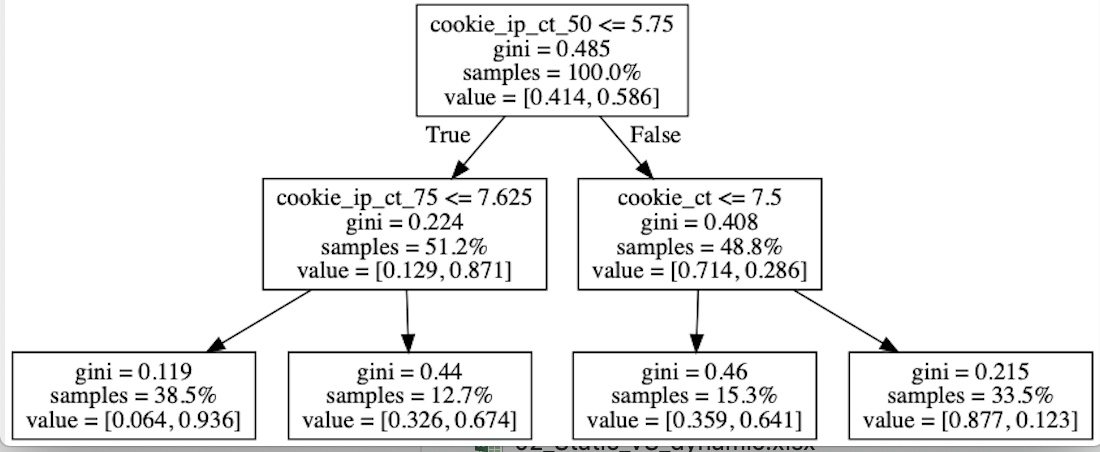
https://towardsdatascience.com/scikit-learn-decision-trees-explained-803f3812290d

## fit the random forest model

In [21]:
# decision tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import Imputer
imputer = Imputer()

y=tv_ip_smy['tpe']=='Static'
X=tv_ip_smy[[x for x in list(tv_ip_smy.columns) if x!='tpe']].values
y=y.values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(imputer.fit_transform(X), y, test_size=0.2, random_state=10)

clf = RandomForestClassifier(n_estimators=40, random_state=10,max_depth=14)
clf = clf.fit(X_train, y_train)

/anaconda3/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [22]:
y_pred=clf.predict(X_test)
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

print([accuracy_score(y_test,y_pred),
                          precision_score(y_test,y_pred),
                          recall_score(y_test,y_pred),
                          f1_score(y_test,y_pred)])

[0.9227541440197163, 0.9251639512932692, 0.9602338217387822, 0.9423727230319437]


In [23]:
import pickle

filename = WF+'02_model.sav'
pickle.dump(clf, open(filename, 'wb'))

## tensorflow

In [50]:
!pip install -q sklearn

In [51]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [26]:
for c in [x for x in list(tv_ip_smy.columns) if x!='tpe']:
    tv_ip_smy[c]=tv_ip_smy[c].fillna(0)

tv_ip_smy[:3]

,tpe,cookie_ct,cookie_ip_ct_25,cookie_ip_ct_50,cookie_ip_ct_75,did_ct,did_ip_ct_25,did_ip_ct_50,did_ip_ct_75,cookie2,...,did50_3,did75_3,cookie4,cookie25_4,cookie50_4,cookie75_4,did4,did25_4,did50_4,did75_4
0,Dynamic,431,11.5,26.0,54.5,177,10.0,23.0,45.00,32,...,171.5,201.25,1,46.0,46.0,46.0,4,109.75,171.5,201.25
1,Static,5,1.0,2.0,2.0,8,2.5,5.5,9.75,4,...,9.0,13.00,2,2.0,2.0,2.0,1,1.00,1.0,1.00
2,Static,6,2.0,2.5,3.0,1,1.0,1.0,1.00,4,...,0.0,0.00,0,0.0,0.0,0.0,0,0.00,0.0,0.00


In [57]:
tv_ip_smy['static']=tv_ip_smy['tpe']=='Static'
tv_ip_smy['static']=tv_ip_smy['static'].astype(int)
tv_ip_smy=tv_ip_smy.drop('tpe',1)
tv_ip_smy[:3]

,cookie_ct,cookie_ip_ct_25,cookie_ip_ct_50,cookie_ip_ct_75,did_ct,did_ip_ct_25,did_ip_ct_50,did_ip_ct_75,cookie2,cookie25_2,...,did75_3,cookie4,cookie25_4,cookie50_4,cookie75_4,did4,did25_4,did50_4,did75_4,static
0,431,11.5,26.0,54.5,177,10.0,23.0,45.00,32,45.25,...,201.25,1,46.0,46.0,46.0,4,109.75,171.5,201.25,0
1,5,1.0,2.0,2.0,8,2.5,5.5,9.75,4,1.00,...,13.00,2,2.0,2.0,2.0,1,1.00,1.0,1.00,1
2,6,2.0,2.5,3.0,1,1.0,1.0,1.00,4,1.75,...,0.00,0,0.0,0.0,0.0,0,0.00,0.0,0.00,1


In [58]:
train, test = train_test_split(tv_ip_smy, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)
print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')

4191291 train examples
1047823 validation examples
1309779 test examples


In [59]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  dataframe = dataframe.copy()
  labels = dataframe.pop('static')
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds

In [60]:
batch_size = 10000 # A small batch sized is used for demonstration purposes
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

In [61]:
for feature_batch, label_batch in train_ds.take(1):
  print('Every feature:', list(feature_batch.keys()))

Every feature: ['cookie_ct', 'cookie_ip_ct_25', 'cookie_ip_ct_50', 'cookie_ip_ct_75', 'did_ct', 'did_ip_ct_25', 'did_ip_ct_50', 'did_ip_ct_75', 'cookie2', 'cookie25_2', 'cookie50_2', 'cookie75_2', 'did2', 'did25_2', 'did50_2', 'did75_2', 'cookie3', 'cookie25_3', 'cookie50_3', 'cookie75_3', 'did3', 'did25_3', 'did50_3', 'did75_3', 'cookie4', 'cookie25_4', 'cookie50_4', 'cookie75_4', 'did4', 'did25_4', 'did50_4', 'did75_4']


In [64]:
feature_columns = []

for header in [x for x in list(tv_ip_smy.columns) if x!='static']:
#for header in ['cookie_ct']:
  feature_columns.append(feature_column.numeric_column(header))
feature_columns

[NumericColumn(key='cookie_ct', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='cookie_ip_ct_25', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='cookie_ip_ct_50', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='cookie_ip_ct_75', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='did_ct', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='did_ip_ct_25', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='did_ip_ct_50', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='did_ip_ct_75', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='cookie2', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='cookie25_2', shape=(1,), defaul

In [65]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(train_ds,
          validation_data=val_ds,
          epochs=5)

Train for 420 steps, validate for 105 steps
Epoch 1/5
420/420 [==============================] - 7377s 18s/step - loss: 24.6184 - accuracy: 0.7890 - val_loss: 10.8268 - val_accuracy: 0.8596
Epoch 2/5
420/420 [==============================] - 7787s 19s/step - loss: 15.6344 - accuracy: 0.8667 - val_loss: 17.7013 - val_accuracy: 0.8779
Epoch 3/5
420/420 [==============================] - 7763s 18s/step - loss: 9.3830 - accuracy: 0.8799 - val_loss: 10.8750 - val_accuracy: 0.8756
Epoch 4/5
420/420 [==============================] - 7373s 18s/step - loss: 7.3063 - accuracy: 0.8855 - val_loss: 7.8973 - val_accuracy: 0.8679
Epoch 5/5
420/420 [==============================] - 7376s 18s/step - loss: 6.8466 - accuracy: 0.8866 - val_loss: 11.2118 - val_accuracy: 0.8860


In [66]:
loss, accuracy = model.evaluate(test_ds)
print("Accuracy", accuracy)

131/131 [==============================] - 32s 242ms/step - loss: 12.1464 - accuracy: 0.8857
Accuracy 0.8856571
